In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import math
import re
import numpy as np

In [2]:
def calculate_frequency(column):
    count = column.value_counts()
    frequency = column.value_counts()/df.shape[0]
#     print("\n By numbers: \n", count)
#     print("\n Frequencies: \n ", frequency)
    return count, frequency

In [3]:
def draw_pie_chart (names, percentages):
    x = names.head(10).index
    y = percentages.head(10)
    porcent = percentages*100
    patches, texts = plt.pie(y, startangle=90, radius=1.2)
    labels = ['{0} - {1:1.2f} %'.format(i,j) for i,j in zip(x, porcent)]
    sort_legend = True
    if sort_legend:
        patches, labels, dummy =  zip(*sorted(zip(patches, labels, y),
                                              key=lambda x: x[2],
                                              reverse=True))

    plt.legend(patches, labels, loc='best', bbox_to_anchor=(-0.1, 1.),
               fontsize=8)

    plt.savefig('piechart.png', bbox_inches='tight')

In [4]:
def is_valid_date(year, month, day):
    day_count_for_month = [31, 28, 31, 30, 31, 30, 31, 31, 30, 31, 30, 31]
    if year%4==0 and (year%100 != 0 or year%400==0):
        day_count_for_month[1] = 29
    return (1 <= month <= 12 and 1 <= day <= day_count_for_month[month-1])

In [128]:
def cleaning_nonblank_attributes(df_copy, should_print): # ovdje trebam dodati Legal i DOing Business as Name provjeru na standardized, zaboravila sam!
    
    df_copy = df_copy.loc[df_copy['APPLICATION TYPE']!='C_SBA']
    if(should_print):
        print("Length after cleaning APPLICATION TYPE: ", len(df_copy))
     
    if( (df_copy['ID'] == '2863270-20220808').any()==False):
        print("Izbacen poslije app type")
        
        
    df_copy = df_copy.loc[(df_copy['CITY']=='CHICAGO') & (df_copy['STATE']=='IL')]
    if(should_print):
        print("Length after cleaning CITY and STATE: ", len(df_copy))
        
    if((df_copy['ID'] == '2863270-20220808').any()==False):
        print("Izbacen poslije city and state")
        
    df_copy = df_copy[~df_copy['ADDRESS'].isin(redacted_address)]
    df_copy = df_copy[~df_copy['ADDRESS'].isin(unstandardized_address)]
    df_copy = df_copy[~df_copy['ADDRESS'].isin(not_all_uppercase_address)]
    
    if(should_print):
        print("Length after cleaning ADDRESS: ", len(df_copy))
        
    if((df_copy['ID'] == '2863270-20220808').any()==False):
        print("Izbacen poslije address")
    
    return df_copy


In [131]:
def ommiting_blank_from_high_quality_data (df_copy, should_print):
    
    df_copy.dropna(subset=['DOING BUSINESS AS NAME'], inplace=True)
    if(should_print):
        print("Length after ommiting blank DOING BUSINESS AS NAME attributes: ", len(df_copy))
    
    if((df_copy['ID'] == '2863270-20220808').any()==False):
        print("Izbacen poslije doing buss")

    df_copy.dropna(subset=['ZIP CODE'], inplace=True)
    if(should_print):
        print("Length after ommiting blank ZIP CODE attributes: ", len(df_copy))
    
    if((df_copy['ID'] == '2863270-20220808').any()==False):
        print("Izbacen poslije zip code")

    df_copy.dropna(subset=['WARD'], inplace=True)
    if(should_print):
        print("Length after ommiting blank WARD attributes: ", len(df_copy))
        
    if((df_copy['ID'] == '2863270-20220808').any()==False):
        print("Izbacen poslije ward")

    df_copy.dropna(subset=['PRECINCT'], inplace=True)
    if(should_print):
        print("Length after ommiting blank PRECINCT attributes: ", len(df_copy))
        
    if((df_copy['ID'] == '2863270-20220808').any()==False):
        print("Izbacen poslije precinct")

    df_copy.dropna(subset=['WARD PRECINCT'], inplace=True)
    if(should_print):
        print("Length after ommiting blank WARD PRECINCT attributes: ", len(df_copy))
        
    if((df_copy['ID'] == '2863270-20220808').any()==False):
        print("Izbacen poslije ward precint")

    df_copy.dropna(subset=['POLICE DISTRICT'], inplace=True)
    if(should_print):
        print("Length after ommiting blank POLICE DISTRICT attributes: ", len(df_copy))
        
    if((df_copy['ID'] == '2863270-20220808').any()==False):
        print("Izbacen poslije police dist")

    df_copy.dropna(subset=['BUSINESS ACTIVITY ID'], inplace=True)
    if(should_print):
        print("Length after ommiting blank BUSINESS ACTIVITY ID attributes: ", len(df_copy))
        
    if((df_copy['ID'] == '2863270-20220808').any()==False):
        print("Izbacen poslije busines ac id")

    df_copy.dropna(subset=['BUSINESS ACTIVITY'], inplace=True)
    if(should_print):
        print("Length after ommiting blank BUSINESS ACTIVITY attributes: ", len(df_copy))
        
    if((df_copy['ID'] == '2863270-20220808').any()==False):
        print("Izbacen poslije bus act description")

    df_copy.dropna(subset=['APPLICATION REQUIREMENTS COMPLETE'], inplace=True)
    if(should_print):
        print("Length after ommiting blank APPLICATION REQUIREMENTS COMPLETE attributes: ", len(df_copy))
        
    if((df_copy['ID'] == '2863270-20220808').any()==False):
        print("Izbacen poslije app req complete")

    df_copy.dropna(subset=['PAYMENT DATE'], inplace=True)
    if(should_print):
        print("Length after ommiting blank PAYMENT DATE attributes: ", len(df_copy))
        
    if((df_copy['ID'] == '2863270-20220808').any()==False):
        print("Izbacen poslije pay date")

    df_copy.dropna(subset=['LICENSE TERM START DATE'], inplace=True)
    if(should_print):
        print("Length after ommiting blank LICENSE TERM START DATE attributes: ", len(df_copy))
        
    if((df_copy['ID'] == '2863270-20220808').any()==False):
        print("Izbacen poslije lic term date")

    df_copy.dropna(subset=['LICENSE APPROVED FOR ISSUANCE'], inplace=True)
    if(should_print):
        print("Length after ommiting blank LICENSE APPROVED FOR ISSUANCE attributes: ", len(df_copy))

    if((df_copy['ID'] == '2863270-20220808').any()==False):
        print("Izbacen poslije lic approved")
        
    df_copy.dropna(subset=['LATITUDE'], inplace=True)
    if(should_print):
        print("Length after ommiting blank LATITUDE attributes: ", len(df_copy))
        
    if((df_copy['ID'] == '2863270-20220808').any()==False):
        print("Izbacen poslije lat")

    df_copy.dropna(subset=['LONGITUDE'], inplace=True)
    if(should_print):
        print("Length after ommiting blank LONGITUDE attributes: ", len(df_copy))
        
    if((df_copy['ID'] == '2863270-20220808').any()==False):
        print("Izbacen poslije long")

    df_copy.dropna(subset=['LOCATION'], inplace=True)
    if(should_print):
        print("Length after ommiting blank LOCATIONE attributes: ", len(df_copy))
        
    if((df_copy['ID'] == '2863270-20220808').any()==False):
        print("Izbacen poslije loc")
    
    return df_copy

In [7]:
def ommiting_blank_from_medium_quality_data(df_copy, should_print):
    
    df_copy.dropna(subset=['DOING BUSINESS AS NAME'], inplace=True)
    if(should_print):
        print("Length after ommiting blank DOING BUSINESS AS NAME attributes: ", len(df_copy))
    
    df_copy.dropna(subset=['ZIP CODE'], inplace=True)
    if(should_print):
        print("Length after ommiting blank ZIP CODE attributes: ", len(df_copy))
    
    df_copy.dropna(subset=['BUSINESS ACTIVITY ID'], inplace=True)
    if(should_print):
        print("Length after ommiting blank BUSINESS ACTIVITY ID attributes: ", len(df_copy))

    df_copy.dropna(subset=['BUSINESS ACTIVITY'], inplace=True)
    if(should_print):
        print("Length after ommiting blank BUSINESS ACTIVITY attributes: ", len(df_copy))
    
    df_copy.dropna(subset=['LATITUDE'], inplace=True)
    if(should_print):
        print("Length after ommiting blank LATITUDE attributes: ", len(df_copy))

    df_copy.dropna(subset=['LONGITUDE'], inplace=True)
    if(should_print):
        print("Length after ommiting blank LONGITUDE attributes: ", len(df_copy))

    df_copy.dropna(subset=['LOCATION'], inplace=True)
    if(should_print):
        print("Length after ommiting blank LOCATIONE attributes: ", len(df_copy))
    
    return df_copy
    

In [164]:
def final_cleaning_high_quality_data(df_copy, should_print):

    df_copy = df_copy[~df_copy['ZIP CODE'].isin(invalid_zip_codes)] 
    if(should_print):
        print("Length after cleaning invalid ZIP CODE: ", len(df_copy))

    if((df_copy['ID'] == '2863270-20220808').any()==False):
        print("Izbacen poslije invalid zip code")
        
    precincts_by_ward = [ # Ward 1 has 26 Precincts, Ward 2 has 25 Precincts, etc.
        26, 25, 27, 28, 25, 27, 31, 30, 30, 25, 
        23, 22, 40, 15, 20, 25, 29, 26, 36, 23, 
        29, 19, 33, 20, 17, 32, 29, 26, 24, 26, 
        23, 30, 17, 20, 22, 27, 22, 25, 35, 23, 
        31, 24, 23, 21, 29, 23, 28, 35, 17, 28
    ]

    ID_to_drop = []

    for i in range(len(df_copy['WARD'])):
        index_of_precinct = int(df_copy.iloc[i]['WARD']) - 1 
        if( int(df_copy.iloc[i]['PRECINCT'])<0 or int(df_copy.iloc[i]['PRECINCT'])>precincts_by_ward[index_of_precinct]):
            ID_to_drop.append(df_copy.iloc[i]['ID'])
        else:
            pass

    df_copy_2 = df_copy[~df_copy['ID'].isin(ID_to_drop)].copy()

    if((df_copy_2['ID'] == '2863270-20220808').any()==False):
        print("Izbacen poslije invalid precinct")
        
    if(should_print):
        print("Length after cleaning invalid PRECINCT: ", len(df_copy_2))

    df_copy_2 = df_copy_2[~df_copy_2['POLICE DISTRICT'].isin(invalid_pol_district)]
    if(should_print):
        print("Length after cleaning invalid POLICE DISTRICT: ", len(df_copy_2))

    if((df_copy_2['ID'] == '2863270-20220808').any()==False):
        print("Izbacen poslije invalid pol district")

    df_copy_2 = df_copy_2[~df_copy_2['LOCATION'].isin(invalid_loc)]
    if(should_print):
        print("Length after cleaning invalid LOCATION: ", len(df_copy_2))
    
    if((df_copy_2['ID'] == '2863270-20220808').any()==False):
        print("Izbacen poslije invalid loc")
    
    return df_copy_2

In [9]:
def final_cleaning_medium_quality_data(df_copy, should_print):
    
    df_copy = df_copy[~df_copy['ZIP CODE'].isin(invalid_zip_codes)] 
    if(should_print):
        print("Length after cleaning invalid ZIP CODE: ", len(df_copy))
    
    precincts_by_ward = [ # Ward 1 has 26 Precincts, Ward 2 has 25 Precincts, etc.
        26, 25, 27, 28, 25, 27, 31, 30, 30, 25, 
        23, 22, 40, 15, 20, 25, 29, 26, 36, 23, 
        29, 19, 33, 20, 17, 32, 29, 26, 24, 26, 
        23, 30, 17, 20, 22, 27, 22, 25, 35, 23, 
        31, 24, 23, 21, 29, 23, 28, 35, 17, 28
    ]

    index_to_drop = []

    for i in range(len(df_copy['WARD'])):
        if( pd.isna(df_copy.iloc[i]['WARD'])==False and pd.isna(df_copy.iloc[i]['PRECINCT'])==False):
            index_of_precinct = int(df_copy.iloc[i]['WARD']) - 1 
            if( int(df_copy.iloc[i]['PRECINCT'])<0 or int(df_copy.iloc[i]['PRECINCT'])>precincts_by_ward[index_of_precinct]):
                index_to_drop.append(i)
            else:
                pass


    df_copy_2 = df_copy[~df_copy.index.isin(index_to_drop)].copy()

    if(should_print):
        print("Length after cleaning invalid PRECINCT: ", len(df_copy_2))

    df_copy_2 = df_copy_2[~df_copy_2['POLICE DISTRICT'].isin(invalid_pol_district)]
    if(should_print):
        print("Length after cleaning invalid POLICE DISTRICT: ", len(df_copy_2))
    
    df_copy_2 = df_copy_2[~df_copy_2['LOCATION'].isin(invalid_loc)]
    if(should_print):
        print("Length after cleaning invalid LOCATION: ", len(df_copy_2))
    
    return df_copy_2


In [10]:
def percentage(df1, df):
    p = len(df1)/len(df)*100.0
    print("{:.2f} %".format(p))
    return p

In [11]:
def addlabels(x, y):
    for i in range(len(y)):
        if(i==0):
            plt.text(porcent[i]+5, i-0.3, str(round(porcent[i]))+'%', ha = 'center')
        elif(i>0 and i<6):
            plt.text(porcent[i]+4, i-0.3, str(round(porcent[i]))+'%', ha = 'center')
        elif(i>5 and i<13):
            plt.text(porcent[i]+3, i-0.3, str(round(porcent[i]))+'%', ha = 'center')
        elif(i>12 and i<16):
            plt.text(porcent[i]+5.2, i-0.3, str(round(porcent[i], 2))+'%', ha = 'center')
        elif(i==16 or i==17):
            plt.text(porcent[i]+6.5, i-0.3, str('<0.01')+'%', ha = 'center')

In [12]:
def make_table(c, f):
    
    list1 = f.index.tolist()[:5]

    help_list1 = f.values.tolist()[:5]
    help_list2 = c.values.tolist()[:5]

    for i in range(len(help_list1)):
        help_list1[i] = format(help_list1[i], '.3f')


    list2 = []
    for i in range(len(help_list1)):
        list2.append(str(help_list2[i])+' ('+ str(help_list1[i])+'%)')


    table = []
    for name, frequency in zip(list1, list2):
        table.append([name, frequency])

    return table

In [13]:
# Columns (1, 2, 9) have mixed types error. Two solutions: low_memory = False or specify dtype. 
# If I specify them - loading will crash when incorrect dtype appears
df = pd.read_csv('C:/Users/lejla/OneDrive/Documents/GitHub/Data-Analysis-Chicago/Business_Licenses_-_Current_Active_20240312.csv', low_memory = False)

In [14]:
print(df.columns)

Index(['ID', 'LICENSE ID', 'ACCOUNT NUMBER', 'SITE NUMBER', 'LEGAL NAME',
       'DOING BUSINESS AS NAME', 'ADDRESS', 'CITY', 'STATE', 'ZIP CODE',
       'WARD', 'PRECINCT', 'WARD PRECINCT', 'POLICE DISTRICT', 'LICENSE CODE',
       'LICENSE DESCRIPTION', 'BUSINESS ACTIVITY ID', 'BUSINESS ACTIVITY',
       'LICENSE NUMBER', 'APPLICATION TYPE', 'APPLICATION CREATED DATE',
       'APPLICATION REQUIREMENTS COMPLETE', 'PAYMENT DATE',
       'CONDITIONAL APPROVAL', 'LICENSE TERM START DATE',
       'LICENSE TERM EXPIRATION DATE', 'LICENSE APPROVED FOR ISSUANCE',
       'DATE ISSUED', 'LICENSE STATUS', 'LICENSE STATUS CHANGE DATE', 'SSA',
       'LATITUDE', 'LONGITUDE', 'LOCATION'],
      dtype='object')


## Task 1 
### Completeness and empty values

In [15]:
# Counting NA values in all columns
nan_col_count = df.isna().sum()
nan_col_count_sorted = nan_col_count.sort_values(ascending=False)
#print(nan_col_count_sorted)

In [16]:
# Number of rows
df_no_rows = df.shape[0]
print("Number of rows: ", df_no_rows)

Number of rows:  54501


In [17]:
nan_col_count_sorted_no_zeros = nan_col_count_sorted[nan_col_count_sorted!=0]
nan_col_count_sorted_zero_nan_values = nan_col_count_sorted[nan_col_count_sorted==0]
#print("Columns that have some NaN values are named: ", nan_col_count_sorted_no_zeros.index)
#print("Columns that have 0 NaN values are named: ", nan_col_count_sorted_zero_nan_values.index)

#### Columns that have 0 blank values are

In [18]:
from tabulate import tabulate

lista = []
lista = nan_col_count_sorted_zero_nan_values.index.tolist() 
print(lista)

first_col = lista[0:4]
second_col = lista[4:8]
third_col = lista[8:12]
fourth_col = lista[12:16]

table = [first_col, second_col, third_col, fourth_col]
print(tabulate(table, tablefmt='fancy_grid'))

['ACCOUNT NUMBER', 'SITE NUMBER', 'LEGAL NAME', 'LICENSE STATUS', 'DATE ISSUED', 'LICENSE TERM EXPIRATION DATE', 'CONDITIONAL APPROVAL', 'STATE', 'ADDRESS', 'APPLICATION TYPE', 'LICENSE NUMBER', 'LICENSE ID', 'CITY', 'LICENSE DESCRIPTION', 'LICENSE CODE', 'ID']
╒════════════════╤══════════════════════════════╤══════════════════════╤════════════════╕
│ ACCOUNT NUMBER │ SITE NUMBER                  │ LEGAL NAME           │ LICENSE STATUS │
├────────────────┼──────────────────────────────┼──────────────────────┼────────────────┤
│ DATE ISSUED    │ LICENSE TERM EXPIRATION DATE │ CONDITIONAL APPROVAL │ STATE          │
├────────────────┼──────────────────────────────┼──────────────────────┼────────────────┤
│ ADDRESS        │ APPLICATION TYPE             │ LICENSE NUMBER       │ LICENSE ID     │
├────────────────┼──────────────────────────────┼──────────────────────┼────────────────┤
│ CITY           │ LICENSE DESCRIPTION          │ LICENSE CODE         │ ID             │
╘════════════════╧

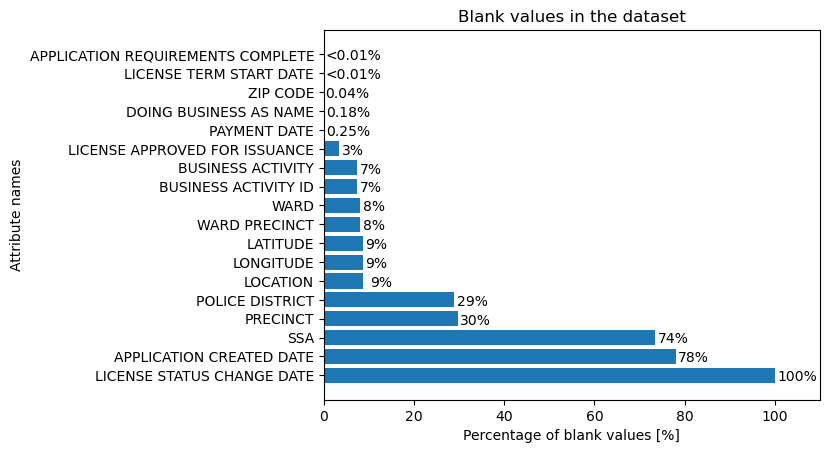

In [19]:
# Pie chart to show data which has some blank values

x = nan_col_count_sorted_no_zeros.index
y = nan_col_count_sorted_no_zeros

porcent = 100.*y/df_no_rows 

ticks = [0, 20, 40, 60, 80, 100, 110]
plt.barh(x, porcent)
plt.ylabel("Attribute names")
plt.xlabel("Percentage of blank values [%]") 
plt.title("Blank values in the dataset")
addlabels(x, y)
plt.xlim([0, 110]) 
plt.xticks(ticks[:-1])
plt.show() 

# Frequencies

In [20]:
c, f = calculate_frequency(df['CITY']);

92.04 % of the data given is for the city of Chicago, 8% of the data are other cities.

In [21]:
# Data which I input, since Chicago is 92% and others which sum up to 8% are too small to show on pie chart
labels = ['Chicago', 'Others']
sizes = [92.04, 7.96]

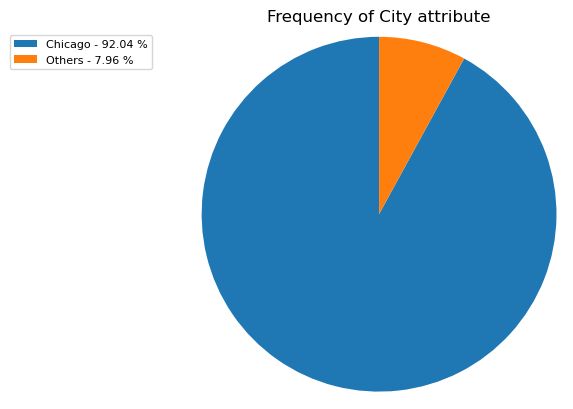

In [22]:
patches, texts = plt.pie(sizes, startangle=90, radius=1.2)
labels_new = ['{0} - {1:1.2f} %'.format(i,j) for i,j in zip(labels, sizes)]

plt.legend(patches, labels_new, loc='best', bbox_to_anchor=(-0.1, 1.), fontsize=8)
    
plt.savefig('piechart.png', bbox_inches='tight')
plt.title('Frequency of City attribute');


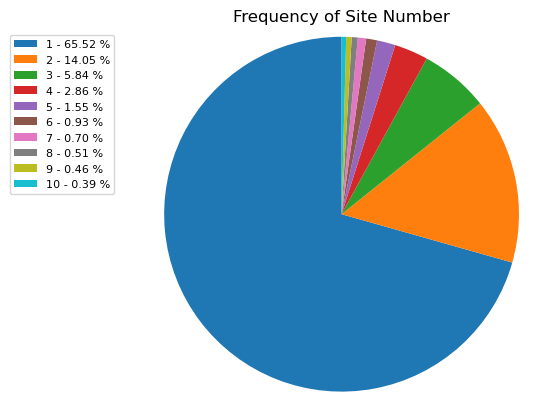

In [23]:
c, f = calculate_frequency(df['SITE NUMBER'])
draw_pie_chart (c, f)
plt.title('Frequency of Site Number');

In [24]:
c, f = calculate_frequency(df['LEGAL NAME'])
table = make_table(c,f)
print(tabulate(table, headers=['Legal Name', 'Record count (Percentage) [%]'], tablefmt='fancy_grid'))

╒════════════════════════════════════╤═════════════════════════════════╕
│ Legal Name                         │ Record count (Percentage) [%]   │
╞════════════════════════════════════╪═════════════════════════════════╡
│ SP PLUS CORPORATION                │ 210 (0.004%)                    │
├────────────────────────────────────┼─────────────────────────────────┤
│ WALGREEN CO.                       │ 200 (0.004%)                    │
├────────────────────────────────────┼─────────────────────────────────┤
│ BOND DRUG COMPANY OF ILLINOIS, LLC │ 138 (0.003%)                    │
├────────────────────────────────────┼─────────────────────────────────┤
│ STARBUCKS CORPORATION              │ 126 (0.002%)                    │
├────────────────────────────────────┼─────────────────────────────────┤
│ COMPASS GROUP USA, INC.            │ 124 (0.002%)                    │
╘════════════════════════════════════╧═════════════════════════════════╛


In [25]:
c, f = calculate_frequency(df['DOING BUSINESS AS NAME'])
table = make_table(c,f)
print(tabulate(table, headers=['Doing Business as Name', 'Record count (Percentage) [%]'], tablefmt='fancy_grid'))

╒══════════════════════════╤═════════════════════════════════╕
│ Doing Business as Name   │ Record count (Percentage) [%]   │
╞══════════════════════════╪═════════════════════════════════╡
│ SUBWAY                   │ 121 (0.002%)                    │
├──────────────────────────┼─────────────────────────────────┤
│ DUNKIN DONUTS            │ 98 (0.002%)                     │
├──────────────────────────┼─────────────────────────────────┤
│ STANDARD PARKING         │ 94 (0.002%)                     │
├──────────────────────────┼─────────────────────────────────┤
│ SHELL                    │ 87 (0.002%)                     │
├──────────────────────────┼─────────────────────────────────┤
│ BP                       │ 80 (0.001%)                     │
╘══════════════════════════╧═════════════════════════════════╛


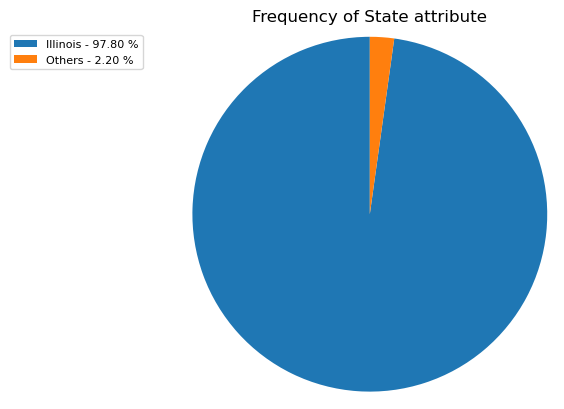

In [26]:
c, f = calculate_frequency(df['STATE'])

# Data which I input because it was more convenient since Illinois is 97% and others that sum up to 3% are to small to show
labels = ['Illinois', 'Others']
sizes = [97.8, 2.2]

patches, texts = plt.pie(sizes, startangle=90, radius=1.2)
labels_new = ['{0} - {1:1.2f} %'.format(i,j) for i,j in zip(labels, sizes)]

plt.legend(patches, labels_new, loc='best', bbox_to_anchor=(-0.1, 1.), fontsize=8)
    
plt.savefig('piechart.png', bbox_inches='tight')
plt.title('Frequency of State attribute');


In [27]:
c, f = calculate_frequency(df['ZIP CODE'])
table = make_table(c,f)
print(tabulate(table, headers=['ZIP Code', 'Record count (Percentage) [%]'], tablefmt='fancy_grid'))

╒════════════╤═════════════════════════════════╕
│   ZIP Code │ Record count (Percentage) [%]   │
╞════════════╪═════════════════════════════════╡
│      60609 │ 1950 (0.036%)                   │
├────────────┼─────────────────────────────────┤
│      60647 │ 1912 (0.035%)                   │
├────────────┼─────────────────────────────────┤
│      60611 │ 1862 (0.034%)                   │
├────────────┼─────────────────────────────────┤
│      60618 │ 1856 (0.034%)                   │
├────────────┼─────────────────────────────────┤
│      60614 │ 1685 (0.031%)                   │
╘════════════╧═════════════════════════════════╛


In [28]:
c, f = calculate_frequency(df['WARD']);
table = make_table(c,f)
print(tabulate(table, headers=['Ward', 'Record count (Percentage) [%]'], tablefmt='fancy_grid'))

╒════════╤═════════════════════════════════╕
│   Ward │ Record count (Percentage) [%]   │
╞════════╪═════════════════════════════════╡
│     42 │ 4663 (0.086%)                   │
├────────┼─────────────────────────────────┤
│     34 │ 2927 (0.054%)                   │
├────────┼─────────────────────────────────┤
│     27 │ 2583 (0.047%)                   │
├────────┼─────────────────────────────────┤
│      1 │ 1655 (0.030%)                   │
├────────┼─────────────────────────────────┤
│     12 │ 1548 (0.028%)                   │
╘════════╧═════════════════════════════════╛


In [29]:
c, f = calculate_frequency(df['PRECINCT']);
table = make_table(c,f) 
print(tabulate(table, headers=['Precint', 'Record count (Percentage) [%]'], tablefmt='fancy_grid'))

╒═══════════╤═════════════════════════════════╕
│   Precint │ Record count (Percentage) [%]   │
╞═══════════╪═════════════════════════════════╡
│         9 │ 1924 (0.035%)                   │
├───────────┼─────────────────────────────────┤
│        27 │ 1159 (0.021%)                   │
├───────────┼─────────────────────────────────┤
│        21 │ 974 (0.018%)                    │
├───────────┼─────────────────────────────────┤
│        10 │ 950 (0.017%)                    │
├───────────┼─────────────────────────────────┤
│        19 │ 929 (0.017%)                    │
╘═══════════╧═════════════════════════════════╛


In [30]:
c, f = calculate_frequency(df['POLICE DISTRICT'])
table = make_table(c,f)
print(tabulate(table, headers=['Police District', 'Record count (Percentage) [%]'], tablefmt='fancy_grid'))


╒═══════════════════╤═════════════════════════════════╕
│   Police District │ Record count (Percentage) [%]   │
╞═══════════════════╪═════════════════════════════════╡
│                 1 │ 3958 (0.073%)                   │
├───────────────────┼─────────────────────────────────┤
│                18 │ 3933 (0.072%)                   │
├───────────────────┼─────────────────────────────────┤
│                19 │ 3602 (0.066%)                   │
├───────────────────┼─────────────────────────────────┤
│                12 │ 3295 (0.060%)                   │
├───────────────────┼─────────────────────────────────┤
│                 8 │ 2483 (0.046%)                   │
╘═══════════════════╧═════════════════════════════════╛


Text(0.5, 1.0, 'Frequency of License Code')

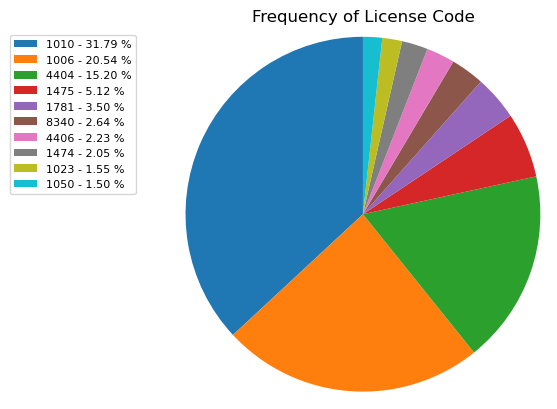

In [31]:
c, f = calculate_frequency(df['LICENSE CODE'])
draw_pie_chart (c, f)
plt.title('Frequency of License Code')

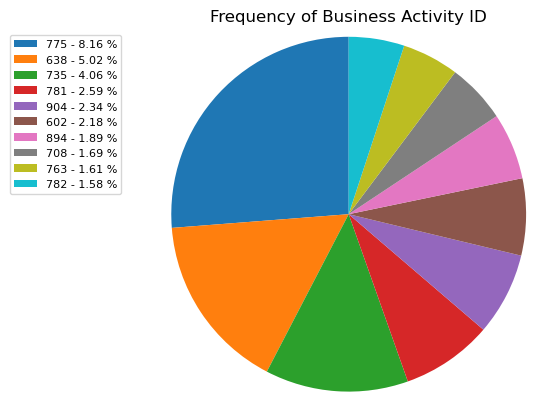

In [32]:
c, f = calculate_frequency(df['BUSINESS ACTIVITY ID'])
draw_pie_chart (c, f)
plt.title('Frequency of Business Activity ID'); #interesantno

In [33]:
c, f = calculate_frequency(df['APPLICATION TYPE'])
table = make_table(c,f)
print(tabulate(table, headers=['Application Type', 'Record count (Percentage) [%]'], tablefmt='fancy_grid'))

╒════════════════════╤═════════════════════════════════╕
│ Application Type   │ Record count (Percentage) [%]   │
╞════════════════════╪═════════════════════════════════╡
│ RENEW              │ 42497 (0.780%)                  │
├────────────────────┼─────────────────────────────────┤
│ ISSUE              │ 11193 (0.205%)                  │
├────────────────────┼─────────────────────────────────┤
│ C_LOC              │ 741 (0.014%)                    │
├────────────────────┼─────────────────────────────────┤
│ C_SBA              │ 44 (0.001%)                     │
├────────────────────┼─────────────────────────────────┤
│ C_EXPA             │ 21 (0.000%)                     │
╘════════════════════╧═════════════════════════════════╛


In [34]:
c, f = calculate_frequency(df['SSA'])
table = make_table(c,f)
print(tabulate(table, headers=['SSA', 'Record count (Percentage) [%]'], tablefmt='fancy_grid'))

╒═══════╤═════════════════════════════════╕
│   SSA │ Record count (Percentage) [%]   │
╞═══════╪═════════════════════════════════╡
│    33 │ 1168 (0.021%)                   │
├───────┼─────────────────────────────────┤
│    10 │ 1018 (0.019%)                   │
├───────┼─────────────────────────────────┤
│    17 │ 642 (0.012%)                    │
├───────┼─────────────────────────────────┤
│     1 │ 579 (0.011%)                    │
├───────┼─────────────────────────────────┤
│    27 │ 551 (0.010%)                    │
╘═══════╧═════════════════════════════════╛


# Dummies, invalid and unstandardized values

#### Adddress 

In [35]:
address_col = df['ADDRESS']
print(len(address_col))
dummy_address = []
valid_address = []
suspicious_address = []


for address in address_col:
        if(address[0].isnumeric()==False): 
            dummy_address.append(address)
        else:
            valid_address.append(address)
        
redacted_address = []
other_address = []

for x in dummy_address:
    if(x[0]=='['):
        redacted_address.append(x)
    else:
        other_address.append(x)

54501


In [36]:
print("Redacted for privacy count: ", len(redacted_address))
print(redacted_address[:10])

Redacted for privacy count:  844
['[REDACTED FOR PRIVACY]', '[REDACTED FOR PRIVACY]', '[REDACTED FOR PRIVACY]', '[REDACTED FOR PRIVACY]', '[REDACTED FOR PRIVACY]', '[REDACTED FOR PRIVACY]', '[REDACTED FOR PRIVACY]', '[REDACTED FOR PRIVACY]', '[REDACTED FOR PRIVACY]', '[REDACTED FOR PRIVACY]']


In [37]:
print("Potentially dummy because they don't follow the format, however it will be checked afterwards: ", len(other_address))
print(other_address) #potentially dummy

Potentially dummy because they don't follow the format, however it will be checked afterwards:  10
['CITY HIGHWAY 14', '--  BUILDING 14, 17TH FL, TOWER C DLF CYBER CITY,', 'PLOT NO. 31  MIDC, PUNE INFOTECH PARK, PHASE -2', 'NORTH 56  W 16865 RIDGEWOOD DR', 'A-  154A   SECTOR 63', 'ONE  PIERCE PLACE  7TH 700', 'ONE  PIERCE PLACE  7TH 700', 'S 561 KENDALL AVE', 'M12-18  SOUTHERN CROSS BLVD., MONTEGO FREEPORT BLVD', 'POBO  466  1ST']


In [38]:
print("Percentage of dummy valeus for Address attribute: ", round(len(redacted_address)/len(address_col)*100.0, 2), " %")

Percentage of dummy valeus for Address attribute:  1.55  %


In [39]:
address_col = address_col[address_col != '[REDACTED FOR PRIVACY]']
unstandardized_address = [] 
standard_address = []
permitted = "0123456789 "

for address in address_col:
    parts = address.split(" ",maxsplit=2) # we have part 0, part 1 and part 2
    if (parts[0]!="" and parts[1]!=""):
        if(parts[0].isdigit()==True and (parts[1]=='E' or parts[1]=='S' or parts[1]=='W' or parts[1]=='N')):
            standard_address.append(address)
        elif(parts[0].isdigit()==False and (parts[1]=='E' or parts[1]=='S' or parts[1]=='W' or parts[1]=='N')):
            if(bool(parts[0].find('-'))==True):
                parts_of_parts = parts[0].split('-')
                is_ok = True
                for i in range (len(parts_of_parts)):
                    parts_of_parts[i].replace(" ", "")
                    if(parts_of_parts[i].isdigit()==False):
                        unstandardized_address.append(address)
                        is_ok = False
                        break
                if(is_ok):
                     standard_address.append(address)
            else:
                unstandardized_address.append(address)
            
        else:
             unstandardized_address.append(address)
    else:
        unstandardized_address.append(address)

        
print("Addresses not in format: NUMBER_E/W/S/N_REMAINING PART: ", len(unstandardized_address))   
# print(len(unstandardized_address)+len(standard_address))
# print(54501-844)
# print(unstandardized_address)

Addresses not in format: NUMBER_E/W/S/N_REMAINING PART:  2760


In [40]:
# Checking if REDACTED are excluded, they were since the length of the array didn't change
for item in unstandardized_address:
    if(item=='[REDACTED FOR PRIVACY]'):
        unstandardized_address.remove(item) 

print(len(unstandardized_address))

2760


In [41]:
all_uppercase_address = []
not_all_uppercase_address = []

for item in address_col:
    if(str(item).isupper()==True):
        all_uppercase_address.append(str(item))
    else:
        not_all_uppercase_address.append(str(item))

print("Number of all uppercase letters written Addresses: ", len(all_uppercase_address), " ", round(len(all_uppercase_address)/len(address_col)*100.0, 3), "%")
print("Number of not all uppercase letters written Addresses: ", len(not_all_uppercase_address), " ", round(len(not_all_uppercase_address)/len(address_col)*100.0, 3), "%")
print("Not all uppercase address is: ", not_all_uppercase_address)


Number of all uppercase letters written Addresses:  53656   99.998 %
Number of not all uppercase letters written Addresses:  1   0.002 %
Not all uppercase address is:  ['31w007  NORTH AVE']


#### Correct Latitude & Longitude

In [42]:
latitude_col = df['LATITUDE']
dummy_latitude = []

for number in latitude_col:
    if(number<-90.0 or number>90.0):
        dummy_latitude.append(number)
        
print("Dummy values for latitude: ", len(dummy_latitude))

Dummy values for latitude:  0


In [43]:
longitude_col = df['LONGITUDE']
dummy_longitude = []

for number in longitude_col:
    if(number<-180.0 or number>180.0):
        dummy_longitude.append(number)
        
print("Dummy values for longitude: ", len(dummy_longitude))

Dummy values for longitude:  0


#### Dates checking

In [44]:
date = df['APPLICATION CREATED DATE']
#print(date)
no_dates = 0
invalid_dates= []

for item in date:
    if(pd.isna(item)==False):
        no_dates = no_dates + 1
        mon = item[0:2]
        day = item[3:5]
        year = item[6:10]
        if (is_valid_date(int(year), int(mon), int(day))==False):
            invalid_dates.append(item)
            
print("Number of invalid dates: ", len(invalid_dates))

Number of invalid dates:  0


In [45]:
date = df['APPLICATION REQUIREMENTS COMPLETE']
#print(date)
no_dates = 0
invalid_dates= []

for item in date:
    if(pd.isna(item)==False):
        no_dates = no_dates + 1
        mon = item[0:2]
        day = item[3:5]
        year = item[6:10]
        if (is_valid_date(int(year), int(mon), int(day))==False):
            invalid_dates.append(item)
            
print("Number of invalid dates: ", len(invalid_dates))

Number of invalid dates:  0


In [46]:
date = df['PAYMENT DATE']
#print(date)
no_dates = 0
invalid_dates= []

for item in date:
    if(pd.isna(item)==False):
        no_dates = no_dates + 1
        mon = item[0:2]
        day = item[3:5]
        year = item[6:10]
        if (is_valid_date(int(year), int(mon), int(day))==False):
            invalid_dates.append(item)
            
print("Number of invalid dates: ", len(invalid_dates))

Number of invalid dates:  0


In [47]:
date = df['LICENSE TERM START DATE']
#print(date)
no_dates = 0
invalid_dates= []

for item in date:
    if(pd.isna(item)==False):
        no_dates = no_dates + 1
        mon = item[0:2]
        day = item[3:5]
        year = item[6:10]
        if (is_valid_date(int(year), int(mon), int(day))==False):
            invalid_dates.append(item)
            
print("Number of invalid dates: ", len(invalid_dates))

Number of invalid dates:  0


In [48]:
date = df['LICENSE TERM EXPIRATION DATE']
#print(date)
no_dates = 0
invalid_dates= []

for item in date:
    if(pd.isna(item)==False):
        no_dates = no_dates + 1
        mon = item[0:2]
        day = item[3:5]
        year = item[6:10]
        if (is_valid_date(int(year), int(mon), int(day))==False):
            invalid_dates.append(item)
            
print("Number of invalid dates: ", len(invalid_dates))

Number of invalid dates:  0


In [49]:
date = df['LICENSE APPROVED FOR ISSUANCE']
#print(date)
no_dates = 0
invalid_dates= []

for item in date:
    if(pd.isna(item)==False):
        no_dates = no_dates + 1
        mon = item[0:2]
        day = item[3:5]
        year = item[6:10]
        if (is_valid_date(int(year), int(mon), int(day))==False):
            invalid_dates.append(item)
            
print("Number of invalid dates: ", len(invalid_dates))

Number of invalid dates:  0


In [50]:
date = df['DATE ISSUED']
#print(date)
no_dates = 0
invalid_dates= []

for item in date:
    if(pd.isna(item)==False):
        no_dates = no_dates + 1
        mon = item[0:2]
        day = item[3:5]
        year = item[6:10]
        if (is_valid_date(int(year), int(mon), int(day))==False):
            invalid_dates.append(item)
            
print("Number of invalid dates: ", len(invalid_dates))

Number of invalid dates:  0


In [51]:
date = df['LICENSE STATUS CHANGE DATE']
#print(date)
no_dates = 0
invalid_dates= []

for item in date:
    if(pd.isna(item)==False):
        no_dates = no_dates + 1
        mon = item[0:2]
        day = item[3:5]
        year = item[6:10]
        if (is_valid_date(int(year), int(mon), int(day))==False):
            invalid_dates.append(item)
            
print("Number of invalid dates: ", len(invalid_dates))

Number of invalid dates:  0


#### Application Type

In [52]:
app_type = df['APPLICATION TYPE']
dummy_app_type = []

for item in app_type: # C_SBA not documented in documentation
    if(item!='ISSUE' and item!='RENEW' and item!='C_LOC' and item!='C_CAPA' and item!='C_EXPA'):
        dummy_app_type.append(item)

print("Number of values in Application type that are not included in documentation: ", len(dummy_app_type)) # it's not dummy
# it's just not documented
print(set(dummy_app_type))

Number of values in Application type that are not included in documentation:  44
{'C_SBA'}


#### Business Activity ID

In [53]:
bus_act = df['BUSINESS ACTIVITY ID'] 
bus_act_des = df['BUSINESS ACTIVITY']
dummy_bus_act = []

for item in bus_act:
    if (pd.isna(item)==False and item.isalpha() == True): #isalpha() check if there are ANY alphabetical signs
        dummy_bus_act.append(item)
            
print("Number of dummy values for Business Activity ID: ", len(dummy_bus_act))

Number of dummy values for Business Activity ID:  0


In [54]:
standardized_bus_act = []
unstandardized_bus_act = []
permitted = "0123456789 "

for item in bus_act:
    if(str(item).isdigit()==True):
        standardized_bus_act.append(item)
    elif (pd.isna(item)==False and str(item).isdigit()==False):
        parts = item.split('|')
        is_ok = True
        for i in range (len(parts)):
            if not (any(c in permitted for c in parts[i])):
                unstandardized_bus_act.append(item)
                is_ok = False
                break
        if(is_ok):
            standardized_bus_act.append(item)
                
    elif(pd.isna(item)==False):
        unstandardized_bus_act.append(item)

print("Number of unstandardized Business Activity ID: ", unstandardized_bus_act)

Number of unstandardized Business Activity ID:  []


In [55]:
possible_invalid = []
for i in range(len(bus_act_des)):
        sign_counts1 = str(bus_act[i]).count('|')
        sign_counts2 = str(bus_act_des[i]).count('|')
        #print(sign_counts1, sign_counts2)
        if(sign_counts1!=sign_counts2):
            possible_invalid.append(bus_act)
            
print("Number of values in Business Activity ID/Description that do not map correctly: ", len(possible_invalid))

Number of values in Business Activity ID/Description that do not map correctly:  0


In [56]:
print(bus_act.nunique())
print(bus_act_des.nunique())

2320
2320


#### License status

In [57]:
lic_stat = df['LICENSE STATUS']
dummy_lic_stat = []

for item in lic_stat:
    if (item!='AAI'): # From documentation this is set to AAI, others are not mentioned
        dummy_lic_stat.append(item)
            
print("Number of dummy values for License status: ", len(dummy_bus_act))

Number of dummy values for License status:  0


#### Conditional Approval

In [58]:
x = df['CONDITIONAL APPROVAL'].nunique()
print(x)

2


In [59]:
y = df['CONDITIONAL APPROVAL'].unique()
print(y)

['N' 'Y']


No dummie values here, since it's always either Y or N.

#### State

In [60]:
usa_state_abbreviations = [
    "AL", "AK", "AZ", "AR", "CA", "CO", "CT", "DE", "FL", "GA",
    "HI", "ID", "IL", "IN", "IA", "KS", "KY", "LA", "ME", "MD",
    "MA", "MI", "MN", "MS", "MO", "MT", "NE", "NV", "NH", "NJ",
    "NM", "NY", "NC", "ND", "OH", "OK", "OR", "PA", "RI", "SC",
    "SD", "TN", "TX", "UT", "VT", "VA", "WA", "WV", "WI", "WY"
]

state = df['STATE']
not_usa = [] # note: they are not dummies, they're just not USA


for item in state:
    state_exists = False
    for i in usa_state_abbreviations:
        if(item==i):
            state_exists=True
            break
    if(state_exists==False):
        not_usa.append(item)

print(not_usa)
print("Number of values that do not represent USA state abbreviations (it's Canada): ", len(not_usa)) # not USA

['ON', 'QC', 'ON', 'GB', 'NS', 'QC', 'QC', 'CN', 'DC']
Number of values that do not represent USA state abbreviations (it's Canada):  9


#### ID = License Number + License term start date

In [61]:
id_num = df['ID']
lic_num = df['LICENSE NUMBER']
lic_term_start = df['LICENSE TERM START DATE']

unstandardized_id = []
invalid_id = []

for i in range (len(id_num)):
    # Split the string into two parts using '-', if this is not possible because of weird format error will occur, no error :)
    parts = str(id_num.iloc[i]).split('-')
    license_num = parts[0]
    lic_date = parts[1]
    if(license_num!=str(lic_num.iloc[i])):
        print("Invalid ID")
    else:
        if(pd.isna(lic_term_start[i])==False):
            
            if(lic_date[0:4]!=lic_term_start[i][6:10] or lic_date[4:6]!=lic_term_start[i][0:2] or lic_date[6:8]!=lic_term_start[i][3:5]):
                invalid_id.append(id_num[i])
        else:
            unstandardized_id.append(id_num[i])

                 
print("Number of invalid ID numbers: ", len(invalid_id))            
print("Number of unstandardized ID numbers: ", unstandardized_id)            


Number of invalid ID numbers:  0
Number of unstandardized ID numbers:  ['2872953-', '2912716-', '2900350-', '2895497-', '2901511-']


#### Location = (Latitude, Longitude)

In [62]:
loc = df['LOCATION']
lat = df['LATITUDE']
lon = df['LONGITUDE']
decimal_number = 6 

# Da se ne desi slucajno lat i lon prazni a ovamo u loc ima neka informacija, i to provjeriti!!! i slicno
invalid_loc = []

dec_points_len_lat = []
dec_point_len_lon = []
dec_points_len_lat_loc = []
dec_point_len_lon_loc = []

for i in range (len(loc)):
    # Split the string into two parts using ',', if this is not possible because of weird format error will occur, no error :)
    if(pd.isna(loc[i])==False):
        parts = str(loc.iloc[i]).split(',')
        
        latitude = re.sub(r'[,()]', '', parts[0])
        longitude = re.sub(r'[,()]', '', parts[1])
        
        no_dec_points_lat_loc = len(str(latitude).split(".")[1])
        no_dec_points_lon_loc = len(str(longitude).split(".")[1])
        
        no_dec_points_lat = len(str(lat[i]).split(".")[1])
        no_dec_points_lon = len(str(lon[i]).split(".")[1])
        
#       print(str(lat[i]).split(".")[1], str(lon[i]).split(".")[1])
        dec_points_len_lat.append(no_dec_points_lat)
        dec_point_len_lon.append(no_dec_points_lon)
        
        dec_points_len_lat_loc.append(no_dec_points_lat_loc)
        dec_point_len_lon_loc.append(no_dec_points_lon_loc)

        latitude = float(latitude)
        longitude = float(longitude)
        
        if(round(latitude, decimal_number)!= round(lat[i], decimal_number) or round(longitude, decimal_number)!=round(lon[i], decimal_number) ):
            invalid_loc.append(loc[i])
            


In [63]:
combined1 = np.vstack((dec_points_len_lat, dec_point_len_lon)).T # latitunde and longitude attributes
combined2 = np.vstack((dec_points_len_lat_loc, dec_point_len_lon_loc)).T # getting lat and lon from location attribute
combined3 = np.hstack ((combined1, combined2))

# Trying to determine if there is a pattern in number of decimal points in lat, lon and location attributes
# print(combined2)
# print(combined1[50:60])
# print(combined2[50:60])
print("Lat Lon Loc (Lat, Lon): \n", combined3[20:40])

Lat Lon Loc (Lat, Lon): 
 [[ 9  9 15 14]
 [ 9  9 14 13]
 [ 9  9 15 14]
 [ 9  9 13 14]
 [ 8  9 13 13]
 [ 9  9 15 14]
 [ 9  8 14 14]
 [ 9  9 14 14]
 [ 9  9 14 14]
 [ 9  9 14 13]
 [ 9  9 14 13]
 [ 9  9 15 14]
 [ 9  8 15 14]
 [ 9  9 14 14]
 [ 9  8 14 14]
 [ 9  9 14 14]
 [ 9  9 14 13]
 [ 9  9 14 14]
 [ 9  9 14 14]
 [ 9  9 14 14]]


In [64]:
set1 = set(dec_points_len_lat)
print("All the decimal point lengths in Latitude attribute: ", set1)

set2 = set(dec_point_len_lon)
print("All the decimal point lengths in Longitude attribute: ", set2)

set3 = set(dec_points_len_lat_loc)
print("All the decimal point lengths in Location (Latitude) attribute: ", set3)

set4 = set(dec_point_len_lon_loc)
print("All the decimal point lengths in Location (Longitude) attribute: ", set4)

All the decimal point lengths in Latitude attribute:  {5, 6, 7, 8, 9}
All the decimal point lengths in Longitude attribute:  {3, 5, 6, 7, 8, 9}
All the decimal point lengths in Location (Latitude) attribute:  {9, 10, 11, 12, 13, 14, 15}
All the decimal point lengths in Location (Longitude) attribute:  {9, 10, 11, 12, 13, 14}


No relation between number of decimal points in: Lat, Lon and Location (lat, lon).


In [65]:
print("Number of invalid patterns for location: ", len(invalid_loc))

Number of invalid patterns for location:  37


#### Legal Name

In [66]:
legal_name = df['LEGAL NAME']
dummies_names = ['INC', 'INC.', 'LLC', 'LTD', 'Co.', 'CORP.', 
                 'THE', 'ACME CORPORATION', 'TEST CO.', 'LOREM IPSUM INC', 
                 'OTHER', 'UNKNOWN']

dummy_legal_names = []
valid_legal_names = []

                 
pattern = r'[^a-zA-Z\s]'

for item in legal_name:
    if item.upper() in dummies_names:
        dummy_legal_names.append(item)
    else:
        valid_legal_names.append(item)
                 
  
print("Number of dummy values in Legal Name: ", len(dummy_legal_names))
        
print(dummy_legal_names)

Number of dummy values in Legal Name:  0
[]


In [67]:
all_uppercase_legal_names = []
not_all_uppercase_legal_names = []

for item in legal_name:
    if(str(item).isupper()==True):
        all_uppercase_legal_names.append(str(item))
    else:
        not_all_uppercase_legal_names.append(str(item))

print("Number of all uppercase letters Legal names: ", len(all_uppercase_legal_names))
print("Number of names that are not all uppercase letters written Legal names: ", len(not_all_uppercase_legal_names))

print(len(all_uppercase_legal_names)+len(not_all_uppercase_legal_names))

Number of all uppercase letters Legal names:  50264
Number of names that are not all uppercase letters written Legal names:  4237
54501


#### Doing Business As Name

In [68]:
bus_as_name = df['DOING BUSINESS AS NAME']

dummy_bus_as_names = []
valid_bus_as_names = []
pattern = r'[^a-zA-Z\s]'

for item in bus_as_name:
    if str(item).upper() in dummies_names:
        dummy_bus_as_names.append(item)
    else:
        valid_bus_as_names.append(item)
                 
    
print("Number of dummie values fot Doing business as name: ", len(dummy_bus_as_names))
        
print(dummy_bus_as_names)


Number of dummie values fot Doing business as name:  0
[]


In [69]:
all_uppercase_bus_as_name = []
not_all_uppercase_bus_as_name = []

for item in bus_as_name:
    if(str(item).isupper()==True):
        all_uppercase_bus_as_name.append(str(item))
    else:
        not_all_uppercase_bus_as_name.append(str(item))

print("Number of all uppercase letters written Busines As Name: ", len(all_uppercase_bus_as_name))
print("Number of not all uppercase letters written Busines As Name: ",len(not_all_uppercase_bus_as_name))

print(len(all_uppercase_bus_as_name)+len(not_all_uppercase_bus_as_name))

Number of all uppercase letters written Busines As Name:  45908
Number of not all uppercase letters written Busines As Name:  8593
54501


#### ZIP Code - but checking if they're only valid for Chicago, if they're some other city - it will be recognized as invalid

In [70]:
chicago_zip_codes = [
    60629, 60618, 60623, 60632, 60639, 60647, 60608, 60617, 60625, 60634, 
    60620, 60628, 60641, 60614, 60609, 60619, 60640, 60651, 60657, 60630, 
    60622, 60626, 60638, 60643, 60613, 60616, 60637, 60644, 60645, 60649, 
    60660, 60615, 60636, 60652, 60610, 60624, 60659, 60621, 60612, 60611, 
    60653, 60655, 60631, 60646, 60656, 60605, 60607, 60642, 60707, 60654, 
    60601, 60633, 60661, 60827, 60606, 60007, 60018, 60068, 60106, 60131, 
    60176, 60602, 60603, 60604, 60699, 60701, 60706, 60714, 60804, 60290, 
    60663, 60668, 60669, 60670, 60673, 60674, 60675, 60677, 60678, 60679, 
    60682, 60684, 60685, 60686, 60687, 60688, 60689, 60693, 60694, 60695, 
    60696, 60697, 60664, 60666, 60680, 60681, 60690, 60691
]

zip_codes = df['ZIP CODE']
invalid_zip_codes = []

    
for item in zip_codes:
    code_chicago = False
    for i in chicago_zip_codes:
        if(pd.isna(item)==False and str(item)==str(i)):
            code_chicago=True
            break
    if(code_chicago==False):
        invalid_zip_codes.append(item)

In [71]:
print("Number of ZIP codes that do not represent Chicago ZIP code is: ", len(invalid_zip_codes))

Number of ZIP codes that do not represent Chicago ZIP code is:  3990


#### Ward
City of Chicago has 50 Wards, hence number of Wards should be between 1 and 50. If there's another city instead oc Chicago, than the ward number may be something else. 

In [72]:
# https://www.chicago.gov/city/en/about/wards.html

In [73]:
ward = df['WARD']
invalid_chicago_ward = []

for item in ward:
    if item<1 or item>50:
        invalid_chicago_ward.append(item)

print(len(invalid_chicago_ward))
        

0


#### Police District
City of Chicago has 25 Police Districts. If the number is not between 1 and 25, it's possible the city is not Chicago.

In [74]:
pol_district = df['POLICE DISTRICT']
invalid_pol_district = []

for item in pol_district:
    if item<1 or item>25:
        invalid_pol_district.append(item)

print("Number of police districts that are possibly invalid (not in Chicago): ", len(invalid_pol_district))
print(invalid_pol_district)

Number of police districts that are possibly invalid (not in Chicago):  2
[0.0, 26.0]


#### Ward Precinct

In [75]:
w_p = df['WARD PRECINCT']
precinct = df['PRECINCT']

In [76]:
invalid_w_p = []
for i in range(len(w_p)):
    string_to_check = []
    if(pd.isna(precinct[i])==True and pd.isna(ward[i])==False):
        string_to_check = str(int(ward[i]))+'-'
        if(w_p[i]!=string_to_check):
            print(w_p[i], " ", string_to_check)
            invalid_w_p.append(w_p[i])
    elif(pd.isna(precinct[i])==False and pd.isna(ward[i])==True):
        string_to_check = '-'+str(int(precinct[i]))
        if(w_p[i]!=string_to_check):
            print(w_p[i], " ", string_to_check)
            invalid_w_p.append(w_p[i])
    elif(pd.isna(precinct[i])==False and pd.isna(ward[i])==False):
        string_to_check = str(int(ward[i]))+'-'+str(int(precinct[i]))
        if(w_p[i]!=string_to_check):
            print(w_p[i], " ", string_to_check)
            invalid_w_p.append(w_p[i])
    elif(pd.isna(precinct[i])==True and pd.isna(ward[i])==True):
        if(pd.isna(w_p[i])!=True):
            invalid_w_p.append(w_p[i])

In [77]:
print("Number of invalid Ward Precinct attributes: ", len(invalid_w_p))

Number of invalid Ward Precinct attributes:  0


#### SSA

In [78]:
numbers = [1, 2, 3, 4, 5, 7, 8, 10, 13, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 
           28, 29, 31, 32, 33, 34, 35, 38, 39, 42, 43, 44, 45, 47, 48, 50, 51, 52, 54, 
           55, 56, 59, 60, 61, 62, 63, 69, 71, 72, 73, 75, 76, 77, 79, 80]

ssa = df['SSA']
ssa_chicago_invalid = []
for item in ssa:
    if item not in numbers and pd.isna(item)==False: #Because a lot of SSA is empty
        ssa_chicago_invalid.append(item)
    
print("SSA that don't belong to Chicago: ", len(ssa_chicago_invalid))

SSA that don't belong to Chicago:  411


#### CITY

In [79]:
unique_cities = df['CITY']
count_unique_cities = unique_cities.value_counts()
print(len(count_unique_cities)) # Not possible to check manually
# Check for numbers! - done

950


In [80]:
unstandardized_cities = []
for item in unique_cities:
    if str(item).isupper()!=True or str(item).isdigit()==True: #checking for lowercase or numbers
        unstandardized_cities.append(item)
print(unstandardized_cities)

[]


####  License Code and Description

In [81]:
license_code = df['LICENSE CODE'] # They are never blank, which is awesome
license_des = df['LICENSE DESCRIPTION']

pairs_of_code_des = []

for i in range(len(license_code)):
    pair = list(tuple([license_code[i], license_des[i]]))
    if pair not in pairs_of_code_des:
        pairs_of_code_des.append(pair)
    
print(len(pairs_of_code_des))
print(license_code.nunique())
print(license_des.nunique())

60
60
60


Mapping of values is unique since the number of pairs equals to unique numbers of license code & description aswell.

# Filtering Algorithm and spliting data to High, Medium and Low quality

In [103]:
# High quality data

In [159]:
df_no_duplicates = df.drop_duplicates(subset=['ID'])
print("Size before and after removing duplicates based on ID: ", len(df), ", ", len(df_no_duplicates))

Size before and after removing duplicates based on ID:  54501 ,  54501


In [160]:
print(df_no_duplicates['ID'].nunique())

54501


Checking non-blank attributes for invalid/unstandardized formats.

In [170]:
df_1 = cleaning_nonblank_attributes(df_no_duplicates, 0)
df_3 = df_1.copy() # Dataframe without duplicates and which has nonblank attributes valid and standardized
df_2 = ommiting_blank_from_high_quality_data(df_1, 0) # Omitting attributes that could be blank and removing blank values from High quality subset.
high_quality_data = final_cleaning_high_quality_data(df_2, 0) # Omitting invalid/unstandardized rows from the values that could be incorrect.
percentage_high_quality_data = percentage(high_quality_data , df)

['2027540-20220616', '1939-20220916', '1938-20220916', '1145136-20220916', '2321004-20220816', '2496643-20220516', '2762351-20230116', '2424089-20220516', '2846224-20220511', '1647969-20220916', '2027538-20220616', '2464517-20220516', '1937-20220916', '2846248-20220511', '61236-20220516', '2807513-20220808', '2232177-20220816', '2738366-20230701', '1383016-20220916', '2411636-20220916', '2205265-20220916', '1918-20220916', '6698-20220816', '2405444-20220616', '61234-20220516', '2341889-20220816', '2616616-20220916', '2863318-20220808', '2428253-20220916', '1919-20220916', '1920-20220916', '1928-20220916', '5490-20220716', '2594659-20220416', '2863308-20220808', '61237-20220516', '2579004-20220316', '2488433-20220916', '2192834-20220916', '1929-20220916', '2327015-20220516', '2817580-20220512', '2208844-20220616', '1594380-20220616', '5367-20230416', '2208797-20220616', '2846298-20220512', '2709501-20220516', '2846299-20220512', '2469258-20220616', '52210-20220616', '1224198-20220616', 

Percentage of high quality data is 44.10 %.

In [169]:
not_high_quality = df[~df['ID'].isin(high_quality_data['ID'])]
not_high_quality.to_csv('C:/Users/lejla/OneDrive/Documents/GitHub/Data-Analysis-Chicago/not_high_quality_data.csv')

In [168]:
high_quality_data.to_csv('C:/Users/lejla/OneDrive/Documents/GitHub/Data-Analysis-Chicago/high_quality_data.csv')

In [107]:
# Medium quality data

In [132]:
df_4 = ommiting_blank_from_medium_quality_data(df_3, 0)
medium_quality_data = final_cleaning_medium_quality_data(df_4, 0)
medium_quality_data_final = medium_quality_data[~medium_quality_data['ID'].isin(high_quality_data['ID'])] 
# because restrictions are loose in medium quality, omit values that could be already high quality data from this one
percentage_medium_quality_data = percentage(medium_quality_data_final, df)

KeyboardInterrupt: 

Percentage of medium quality data is 27.52 %

In [116]:
medium_quality_data_final.to_csv('C:/Users/lejla/OneDrive/Documents/GitHub/Data-Analysis-Chicago/medium_quality_data.csv')

In [110]:
# Low quality data

In [111]:
help_df = df[~df['ID'].isin(high_quality_data['ID'])] # help = low + medium, need to omit medium
low_quality_data = help_df[~help_df['ID'].isin(medium_quality_data['ID'])]
percentage_low_quality_data = percentage(low_quality_data , df)

28.38 %


In [117]:
low_quality_data.to_csv('C:/Users/lejla/OneDrive/Documents/GitHub/Data-Analysis-Chicago/low_quality_data.csv')

Percentage of low quality data is 28.38 %

In [113]:
print(percentage_low_quality_data + percentage_medium_quality_data + percentage_high_quality_data)

100.0


### Exporting df for QGIS

In [93]:
df_bus_act = df[(df['BUSINESS ACTIVITY ID'] == '775') | (df['BUSINESS ACTIVITY ID'] == '638') |
                (df['BUSINESS ACTIVITY ID'] == '735') | (df['BUSINESS ACTIVITY ID'] == '781') |
                (df['BUSINESS ACTIVITY ID'] == '904')]  
df_bus_act.to_csv('df_bus_act.csv')
print(len(df_bus_act))

12081


In [94]:
df_ward = df[(df['WARD'] == float(42)) | (df['WARD'] == float(1)) |
                (df['WARD'] == float(12)) | (df['WARD'] == float(34)) |
                (df['WARD'] == float(27))] 
                                          
df_ward.to_csv('df_ward.csv')  
                                          
print(len(df_ward))                                         

13376


In [95]:
df_bus_act = df[(df['LICENSE CODE'] == 1010) | (df['LICENSE CODE'] == 1006) |
                (df['LICENSE CODE'] == 1475) | (df['LICENSE CODE'] == 1781) |
                (df['LICENSE CODE'] == 4404)]  
df_bus_act.to_csv('df_bus_act.csv')
print(len(df_bus_act))

41499


In [99]:
x = low_quality_data[low_quality_data['ID']=='2863270-20220808'] 
print(x)

                  ID  LICENSE ID  ACCOUNT NUMBER  SITE NUMBER  \
77  2863270-20220808     2863270          488323            1   

               LEGAL NAME DOING BUSINESS AS NAME           ADDRESS     CITY  \
77  CATERINA P GROUP INC.  CATERINA P GROUP INC.  7022 W ROSCOE ST  CHICAGO   

   STATE ZIP CODE  ...  LICENSE TERM START DATE  LICENSE TERM EXPIRATION DATE  \
77    IL    60634  ...               08/08/2022                    08/15/2024   

   LICENSE APPROVED FOR ISSUANCE  DATE ISSUED  LICENSE STATUS  \
77                    08/08/2022   08/08/2022             AAI   

   LICENSE STATUS CHANGE DATE SSA   LATITUDE  LONGITUDE  \
77                        NaN NaN  41.941817 -87.802307   

                                    LOCATION  
77  (41.941817381411816, -87.80230679030826)  

[1 rows x 34 columns]


In [100]:
print(x['ADDRESS'].isin(unstandardized_address))


77    False
Name: ADDRESS, dtype: bool


In [101]:
print(x['LOCATION'].isin(invalid_loc))

77    False
Name: LOCATION, dtype: bool


In [102]:
print(x['POLICE DISTRICT'].isin(invalid_pol_district))

77    False
Name: POLICE DISTRICT, dtype: bool


In [122]:
print(x['ID'].isin(invalid_id))

77    False
Name: ID, dtype: bool
